In [1]:
# AIM: To put the resampled SRTM of 0.25 (IMD) resolution on the IMD grids

In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.4 MB/s eta 0:00:00


In [4]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob as gb
import xarray
import rasterio
from rasterio.plot import show

In [5]:
# converting it to numpy

os.chdir("/content/drive/MyDrive/srtm_30m")
file_open=rasterio.open("SRTM_30m_resampled_to_IMD_ressolution_of_0.25.tif")
file1=file_open.read(1)
print(file1.shape)


(48, 48)


In [6]:
import fiona
import rasterio
import rasterio.mask

In [7]:
# OBJECTIVE 1: Import the latitude and the longitude of the SRTM data (resampled).

In [8]:

os.chdir("/content/drive/MyDrive/srtm_30m")
srtm_df=pd.read_csv("srtm_lat_lon_v2.csv",index_col=0)
print(srtm_df.head())

srtm_values=srtm_df['grid_code']

srtm_lat_lon=srtm_df.drop(['pointid','grid_code'],axis=1)
print(srtm_lat_lon.head())

srtm_lat_lon_np=srtm_lat_lon.to_numpy()
print(srtm_lat_lon_np.shape)

     pointid  grid_code   Latitude  Longitude
FID                                          
0          1       3433  38.825188  71.174965
1          2       3686  38.825188  71.424965
2          3       3942  38.825188  71.674965
3          4       4372  38.825188  71.924965
4          5       4592  38.825188  72.174965
      Latitude  Longitude
FID                      
0    38.825188  71.174965
1    38.825188  71.424965
2    38.825188  71.674965
3    38.825188  71.924965
4    38.825188  72.174965
(2304, 2)


In [9]:
# The following section is shapefile specific !!! ##################### START ###################

In [10]:
shape_file_folder='nwh_shape_with_state_boundaries' # CHANGE HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!
shape_file='nwh.shp'
roi="NWH"

In [11]:
# OBJECTIVE 2: To a particular shapefile, clip the region of interest from the IMD data.

# Now for IMD, we first need to clip it and store it.
# From it, I can extract the latitude and the longitude.
# I already have the clipped IMD image, so I am not going to do it again!!!

#os.chdir("/content/drive/MyDrive/IMD_JJAS_raster_images_daily/2009") # Exporting an IMD file (any)
#src_raster_path = r'2009_day_88.tif' # IMD FILE NAME

# Importing the shape file
#os.chdir("/content/drive/MyDrive/shapefiles/"+shape_file_folder)
#shp_file_path = shape_file



#with fiona.open(shp_file_path, "r") as shapefile:
#    shapes = [feature["geometry"] for feature in shapefile]

#os.chdir("/content/drive/MyDrive/IMD_JJAS_raster_images_daily/2009")
#with rasterio.open(src_raster_path) as src:

#    out_image1, out_transform1 = rasterio.mask.mask(src, shapes, crop=True)
#    out_meta1 = src.meta

#out_meta1.update({"driver": "GTiff",
#                 "height": out_image1.shape[1],
#                 "width": out_image1.shape[2],
#                 "transform": out_transform1})

#os.chdir("/content/drive/MyDrive/experiment_folder")
#with rasterio.open("IMD_"+roi+"_clipped_ENTIRE_v1.tif", "w", **out_meta1) as dest:
#    dest.write(out_image1)



In [12]:
# Now, use ArcGIS to extract the latitude and longitude

In [13]:
# OBJECTIVE 3: Import the latitude and longitude of the IMD clipped region so prepared in ArcGIS.

# Extracting the latitude and longitude file of IMD pertaining to NWH
os.chdir("/content/drive/MyDrive/imd_lat_lon_folder")
#imd_lat_lon=pd.read_csv("IMD_ENTIRE_lat_lon_list.csv",index_col=0)
imd_lat_lon=pd.read_csv("IMD_NWH_lat_lon_file.csv",index_col=0)
print(imd_lat_lon.head())

imd_df=imd_lat_lon['grid_code']
imd_lat_lon=imd_lat_lon.drop(['pointid','grid_code'],axis=1)
print(imd_lat_lon.head())
imd_lat_lon_np=imd_lat_lon.to_numpy()
print(imd_lat_lon_np.shape)

# Storing the latitude and the longitude where there are values
imd_lat=imd_lat_lon['Latitude'].to_numpy()
imd_lon=imd_lat_lon['Longitude'].to_numpy()

print(imd_lat.shape,imd_lon.shape)
print(np.min(imd_lat),np.max(imd_lat))
print(np.min(imd_lon),np.max(imd_lon))

     pointid  grid_code  Latitude  Longitude
FID                                         
0          1        0.0     37.00      74.75
1          2        0.0     37.00      75.25
2          3        0.0     36.75      74.00
3          4        0.0     36.75      74.25
4          5        0.0     36.75      74.50
     Latitude  Longitude
FID                     
0       37.00      74.75
1       37.00      75.25
2       36.75      74.00
3       36.75      74.25
4       36.75      74.50
(517, 2)
(517,) (517,)
28.75 37.0
72.75 81.0


In [14]:
# OBJECTIVE 4: Creating a lat and lon file of IMD configuration using the IMD lat-lon values. This will be used to create meshgrid.
print(np.min(imd_lat),np.max(imd_lat))
print(np.min(imd_lon),np.max(imd_lon))

lat_srtm_new=np.arange(np.min(imd_lat),np.max(imd_lat)+0.25,0.25)
print(lat_srtm_new.shape)
print(lat_srtm_new[10])
print(lat_srtm_new[0])

lon_srtm_new=np.arange(np.min(imd_lon),np.max(imd_lon)+0.25,0.25)
print(lon_srtm_new.shape)
print(lon_srtm_new[10])
print(lon_srtm_new[0])


print(np.max(lat_srtm_new))
print(np.max(lon_srtm_new))

28.75 37.0
72.75 81.0
(34,)
31.25
28.75
(34,)
75.25
72.75
37.0
81.0


In [15]:
# Checking the shapes !!!
print(srtm_lat_lon_np.shape, srtm_values.shape, imd_lat_lon_np.shape)

(2304, 2) (2304,) (517, 2)


In [16]:
# OBJECTIVE 5: Interpolate the srtm data on IMD grid points.

# Interpolating srtm on IMD grid
import scipy
from scipy.interpolate import griddata


zi = griddata( (srtm_lat_lon_np), srtm_values, (imd_lat_lon_np),method='nearest' )
print(type(zi))
print(zi.shape)


<class 'numpy.ndarray'>
(517,)


In [17]:
# OBJECTIVE 6:Create a meshgrid

xx1,yy1=np.meshgrid(lon_srtm_new,lat_srtm_new)
print(xx1.shape)
print(xx1)

print(yy1.shape)
print(yy1)

# Note that the latitude values are from small to big

(34, 34)
[[72.75 73.   73.25 ... 80.5  80.75 81.  ]
 [72.75 73.   73.25 ... 80.5  80.75 81.  ]
 [72.75 73.   73.25 ... 80.5  80.75 81.  ]
 ...
 [72.75 73.   73.25 ... 80.5  80.75 81.  ]
 [72.75 73.   73.25 ... 80.5  80.75 81.  ]
 [72.75 73.   73.25 ... 80.5  80.75 81.  ]]
(34, 34)
[[28.75 28.75 28.75 ... 28.75 28.75 28.75]
 [29.   29.   29.   ... 29.   29.   29.  ]
 [29.25 29.25 29.25 ... 29.25 29.25 29.25]
 ...
 [36.5  36.5  36.5  ... 36.5  36.5  36.5 ]
 [36.75 36.75 36.75 ... 36.75 36.75 36.75]
 [37.   37.   37.   ... 37.   37.   37.  ]]


In [18]:
# Storing the latitude and the longitude
os.chdir('/content/drive/MyDrive/lat_lon_collection')
lat_length=lat_srtm_new.shape[0]
lon_length=lon_srtm_new.shape[0]
lat_list=[]
lon_list=[]

for i1 in range(0,lat_length,1):
  lat_list.append(i1)

for i2 in range(0,lon_length,1):
  lon_list.append(i2)
data1={"Latitude":lat_srtm_new}
data2={"Longitude":lon_srtm_new}
df1=pd.DataFrame(data1)
print(df1.head())

df2=pd.DataFrame(data2)
print(df2.head())

#df1.to_csv("SRTM_ON_IMD_LATITUDE_v2.csv")
#df2.to_csv("SRTM_ON_IMD_LONGITUDE_v2.csv")

   Latitude
0     28.75
1     29.00
2     29.25
3     29.50
4     29.75
   Longitude
0      72.75
1      73.00
2      73.25
3      73.50
4      73.75


In [19]:
# OBJECTIVE 7: Create a dataframe that will contain the IMD lat, IMD lon, and the interpolated SRTM values.

# Creating a dataframe
data={'Latitude':imd_lat, 'Longitude':imd_lon, 'SRTM_values':zi}
df_srtm=pd.DataFrame(data)
print(df_srtm)

df_srtm_np=df_srtm.to_numpy()
print(df_srtm_np.shape)
print(df_srtm_np[78,2])

     Latitude  Longitude  SRTM_values
0       37.00      74.75         4866
1       37.00      75.25         4762
2       36.75      74.00         4627
3       36.75      74.25         4726
4       36.75      74.50         4663
..        ...        ...          ...
512     29.25      80.25         1235
513     29.00      79.50          276
514     29.00      79.75          421
515     29.00      80.00          545
516     28.75      80.00          204

[517 rows x 3 columns]
(517, 3)
3069.0


In [20]:
# OBJECTIVE 8: Fill the meshgrid with the new values

# Defining a function to do the job.
h1=df_srtm_np.shape[0]-1

c=0
k=0

from array import*
def values(lat2,lon2,srtm):
    b=0
    for h1 in range(srtm.shape[0]-1,-1,-1):
        if (srtm[h1,0]==lat2)and(srtm[h1,1]==lon2):
            value1=srtm[h1,2]
            b=b+1
    if b==1:
        return value1
    else:
        value2=np.nan
        return value2


In [21]:
new_srtm=[] # For the interpolated data
print(yy1.shape[0],xx1.shape[1])
for i1 in range(0,yy1.shape[0],1):
    for i2 in range(0,xx1.shape[1],1):
        value_srtm=values(yy1[i1,i2],xx1[i1,i2],df_srtm_np)
        new_srtm.append(value_srtm)

print(len(new_srtm))
new_srtm_np=np.array(new_srtm)
print(new_srtm_np.shape)
print((np.isnan(new_srtm_np)).sum())

# Please check the number of nan values!!!

34 34
1156
(1156,)
639


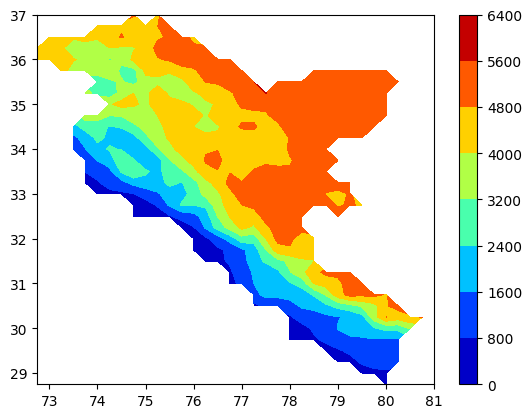

In [22]:
new_srtm_reshaped=new_srtm_np.reshape(xx1.shape[0],xx1.shape[1])

m=plt.contourf(xx1,yy1,new_srtm_reshaped,cmap='jet')
plt.colorbar(m)
plt.show()

In [ ]:
# Storing it as a csv file
df_srtm_test=pd.DataFrame(data=new_srtm_reshaped,columns=lon_srtm_new,index=lat_srtm_new)
print((np.isnan(new_srtm_reshaped)).sum())
os.chdir("/content/drive/MyDrive/srtm_30m")
df_srtm_test.to_csv("srtm_LDK_of_IMD_resolution_and_on_IMD_grids.csv")

print(new_srtm_reshaped.shape)

327
(19, 31)
